In [278]:
import pandas as pd
import time
import datetime
import numpy as np

In [279]:
PATH_TO_DATA = 'Data'
TEST_FILE = 'test_ds.csv'
TRAIN_FILE = 'train_ds.csv'

In [280]:
def read_data(folder, file):
    df = pd.read_csv(folder + '/' + file)
    return df

In [281]:
train_df = read_data(PATH_TO_DATA, TRAIN_FILE)

In [282]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Data columns (total 9 columns):
cgsettlementbufferid    92700 non-null int64
mcc                     92700 non-null int64
tranccy                 92700 non-null int64
ccy                     92700 non-null int64
amount                  92700 non-null int64
location                92700 non-null object
trandatetime            92700 non-null int64
sexid                   92700 non-null int64
clientid                92700 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.4+ MB


In [283]:
train_df_index = train_df.index.tolist()

In [284]:
y_train_total = train_df['sexid']

In [285]:
len(y_train_total)

92700

In [286]:
y_train_total.to_csv('y_labels.csv', index=None)

In [287]:
cat_df = train_df.drop(['cgsettlementbufferid', 'sexid'], axis=1)

Нормализуем сумму платежа в зависимости от валюты транзакции (платежа)

In [288]:
curr_data = dict()
for curr in list(cat_df['tranccy'].unique()):
    max_curr = cat_df[cat_df['tranccy'] == curr]['amount'].max()
    min_curr = cat_df[cat_df['tranccy'] == curr]['amount'].min()
    curr_data[curr] = [max_curr, min_curr]

def min_max_amount(raw):
    if curr_data[raw['tranccy']][0] != curr_data[raw['tranccy']][1]:
        temp = (raw['amount'] - curr_data[raw['tranccy']][1]) / (curr_data[raw['tranccy']][0] - curr_data[raw['tranccy']][1])
    else:
        temp = raw['amount'] / raw['amount']
            
    return temp

cat_df['amount'] = cat_df.apply(min_max_amount, axis=1)

Просмотр на предмет объектов None после нормализации по валютам тренировочных данных поля ammount

In [289]:
for am in list(cat_df['amount'].unique()):
    if type(am) == None:
        print(am, type(am))

Обработка временных параметров в тестовых данных

In [290]:
import datetime
import time

def get_day(timestamp):
    day = datetime.datetime.fromtimestamp(timestamp).strftime('%A')
    return day

def get_week(timestamp):
    week = datetime.datetime.fromtimestamp(timestamp).strftime('%W')
    return week

def get_month(timestamp):
    month = datetime.datetime.fromtimestamp(timestamp).strftime('%B')
    return month

def get_year(timestamp):
    year = datetime.datetime.fromtimestamp(timestamp).strftime('%Y')
    return year

def get_hour(timestamp):
    hour = datetime.datetime.fromtimestamp(timestamp).strftime('%H')
    return hour

Обработка географических параметров в тестовых данных

In [291]:
def get_country(local):
    country = local[36:].strip()
    return country

def get_city(local):
    city = local[23:36].strip()
    return city

def get_inst(local):
    inst = local[0:22].strip()
    return inst

Применение к фрейму с тренировочными данными всего наработанного география и время

In [292]:
cat_df['year'] = cat_df['trandatetime'].apply(lambda x: get_year(x))
cat_df['month'] = cat_df['trandatetime'].apply(lambda x: get_month(x))
cat_df['week'] = cat_df['trandatetime'].apply(lambda x: get_week(x))
cat_df['day'] = cat_df['trandatetime'].apply(lambda x: get_day(x))
cat_df['hour'] = cat_df['trandatetime'].apply(lambda x: get_hour(x))
cat_df['country'] = cat_df['location'].apply(lambda x: get_country(x))
cat_df['city'] = cat_df['location'].apply(lambda x: get_city(x))
cat_df['institution'] = cat_df['location'].apply(lambda x: get_inst(x))

Упорядочиваем написание стран

In [293]:
print(len(sorted(cat_df['country'].unique().tolist())))

154


In [294]:
full_country_list = sorted(cat_df['country'].unique().tolist())
print(sorted(cat_df['country'].unique().tolist()))

['', '. UA', 'A UA', 'AD', 'ADAD', 'AE', 'AEAE', 'AG', 'AM', 'ARUS', 'AT', 'ATAT', 'AU', 'AUAU', 'AZ', 'AZUS', 'BB', 'BE', 'BEBE', 'BF', 'BG', 'BGBG', 'BR', 'BY', 'CAUS', 'CH', 'CHCH', 'CN', 'CNCN', 'CR', 'CW', 'CY', 'CYCY', 'CZ', 'CZCZ', 'DCUS', 'DE', 'DEDE', 'DK', 'DKDK', 'DO', 'DODO', 'EE', 'EG', 'EGEG', 'ES', 'ESES', 'FI', 'FLUS', 'FR', 'FRFR', 'GAUS', 'GB', 'GBGB', 'GE', 'GEGE', 'GH', 'GI', 'GR', 'GRGR', 'HK', 'HKHK', 'HR', 'HRHR', 'HU', 'HUHU', 'IAUS', 'ID', 'IDUS', 'IE', 'IEIE', 'IL', 'ILIL', 'ILUS', 'IN', 'ININ', 'IT', 'ITIT', 'JO', 'JPJP', 'K UA', 'KN', 'KZ', 'KZKZ', 'LK', 'LT', 'LU', 'LULU', 'LV', 'LVLV', 'MC', 'MCMC', 'MD', 'MDMD', 'MDUS', 'ME', 'MEME', 'MGMG', 'MK', 'MKMK', 'ML', 'MNUS', 'MT', 'MU', 'MUMU', 'MV', 'MY', 'NEUS', 'NJUS', 'NL', 'NLNL', 'NO', 'NONO', 'NVUS', 'NYUS', 'OHUS', 'ONCA', 'PAUS', 'PEPE', 'PL', 'PLPL', 'PR', 'PT', 'PTPT', 'PYPY', 'RO', 'RORO', 'RS', 'RSRS', 'RU', 'RURU', 'SE', 'SESE', 'SG', 'SI', 'SISI', 'SK', 'SKSK', 'SKUA', 'SN', 'TG', 'TH', 'TJ', 'TR

In [295]:
UA_list = ['. UA', 'A UA', 'UA', 'UAUA', 'UA', 'K UA']
AD_list = ['AD', 'ADAD']
AE_list = ['AE', 'AEAE']
AT_list = ['AT', 'ATAT']
AU_list = ['AU', 'AUAU']
BE_list = ['BE', 'BEBE']
BG_list = ['BG', 'BGBG']
BY_list = ['BY', 'BYBY']
US_list = ['USUS', 'UTUS', 'US', 'WAUS', 'WIUS', 'AZUS', 'DEUS', 'FLUS', 'GAUS']

In [296]:
def get_US_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('US'):
                res.append(con)
    return res

def get_UA_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('UA'):
                res.append(con)
    return res

In [297]:
list_US = get_US_list(sorted(cat_df['country'].unique().tolist()))
list_UA = get_UA_list(sorted(cat_df['country'].unique().tolist()))

In [298]:
print(len(list_US))
print(len(list_UA))

21
5


In [299]:
temp_country_list = set(full_country_list) - set(list_US) - set(list_UA)

In [300]:
temp_country_list

{'',
 'AD',
 'ADAD',
 'AE',
 'AEAE',
 'AG',
 'AM',
 'AT',
 'ATAT',
 'AU',
 'AUAU',
 'AZ',
 'BB',
 'BE',
 'BEBE',
 'BF',
 'BG',
 'BGBG',
 'BR',
 'BY',
 'CH',
 'CHCH',
 'CN',
 'CNCN',
 'CR',
 'CW',
 'CY',
 'CYCY',
 'CZ',
 'CZCZ',
 'DE',
 'DEDE',
 'DK',
 'DKDK',
 'DO',
 'DODO',
 'EE',
 'EG',
 'EGEG',
 'ES',
 'ESES',
 'FI',
 'FR',
 'FRFR',
 'GB',
 'GBGB',
 'GE',
 'GEGE',
 'GH',
 'GI',
 'GR',
 'GRGR',
 'HK',
 'HKHK',
 'HR',
 'HRHR',
 'HU',
 'HUHU',
 'ID',
 'IE',
 'IEIE',
 'IL',
 'ILIL',
 'IN',
 'ININ',
 'IT',
 'ITIT',
 'JO',
 'JPJP',
 'KN',
 'KZ',
 'KZKZ',
 'LK',
 'LT',
 'LU',
 'LULU',
 'LV',
 'LVLV',
 'MC',
 'MCMC',
 'MD',
 'MDMD',
 'ME',
 'MEME',
 'MGMG',
 'MK',
 'MKMK',
 'ML',
 'MT',
 'MU',
 'MUMU',
 'MV',
 'MY',
 'NL',
 'NLNL',
 'NO',
 'NONO',
 'ONCA',
 'PEPE',
 'PL',
 'PLPL',
 'PR',
 'PT',
 'PTPT',
 'PYPY',
 'RO',
 'RORO',
 'RS',
 'RSRS',
 'RU',
 'RURU',
 'SE',
 'SESE',
 'SG',
 'SI',
 'SISI',
 'SK',
 'SKSK',
 'SN',
 'TG',
 'TH',
 'TJ',
 'TR',
 'TRTR',
 'UA',
 'VN',
 'oCHCH',
 '™rCHCH'}

In [301]:
def get_double(country_list):
    res_dict = dict()
    two_letters_list = list()
    for country in country_list:
        if len(country) == 2:
            two_letters_list.append(country)
    for two in two_letters_list:
        for country in country_list:
            if len(country) == 4:
                if country.endswith(two):
                    res_dict[two] = [two, country]
    return res_dict

In [302]:
doubles_dict = get_double(temp_country_list)

In [303]:
doubles_dict['UA'] = list_UA
doubles_dict['US'] = list_US

In [304]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

116


In [305]:
temp = list()
for val in doubles_dict.values():
    temp = temp + val

temp_country = list(set(full_country_list) - set(temp))
print(temp_country)

['', 'PR', 'ID', 'BF', 'CR', 'AG', 'EE', 'GI', 'FI', 'MT', 'PEPE', 'BB', 'AM', '™rCHCH', 'UA', 'JPJP', 'MGMG', 'KN', 'SN', 'LT', 'BY', 'MV', 'SG', 'oCHCH', 'GH', 'TJ', 'AZ', 'MY', 'ML', 'LK', 'ONCA', 'BR', 'JO', 'TH', 'VN', 'CW', 'TG', 'PYPY']


In [306]:
doubles_dict['UA'].append('UA')
temp_country.remove('UA')

In [307]:
doubles_dict

{'CN': ['CN', 'CNCN'],
 'NO': ['NO', 'NONO'],
 'NL': ['NL', 'NLNL'],
 'MK': ['MK', 'MKMK'],
 'BE': ['BE', 'BEBE'],
 'RU': ['RU', 'RURU'],
 'SI': ['SI', 'SISI'],
 'IT': ['IT', 'ITIT'],
 'GR': ['GR', 'GRGR'],
 'HR': ['HR', 'HRHR'],
 'TR': ['TR', 'TRTR'],
 'MD': ['MD', 'MDMD'],
 'DE': ['DE', 'DEDE'],
 'RO': ['RO', 'RORO'],
 'IL': ['IL', 'ILIL'],
 'ME': ['ME', 'MEME'],
 'AD': ['AD', 'ADAD'],
 'EG': ['EG', 'EGEG'],
 'HK': ['HK', 'HKHK'],
 'SK': ['SK', 'SKSK'],
 'IE': ['IE', 'IEIE'],
 'LU': ['LU', 'LULU'],
 'FR': ['FR', 'FRFR'],
 'AU': ['AU', 'AUAU'],
 'DO': ['DO', 'DODO'],
 'AT': ['AT', 'ATAT'],
 'PL': ['PL', 'PLPL'],
 'IN': ['IN', 'ININ'],
 'CZ': ['CZ', 'CZCZ'],
 'RS': ['RS', 'RSRS'],
 'CY': ['CY', 'CYCY'],
 'MU': ['MU', 'MUMU'],
 'HU': ['HU', 'HUHU'],
 'BG': ['BG', 'BGBG'],
 'KZ': ['KZ', 'KZKZ'],
 'ES': ['ES', 'ESES'],
 'MC': ['MC', 'MCMC'],
 'DK': ['DK', 'DKDK'],
 'LV': ['LV', 'LVLV'],
 'AE': ['AE', 'AEAE'],
 'GE': ['GE', 'GEGE'],
 'SE': ['SE', 'SESE'],
 'PT': ['PT', 'PTPT'],
 'GB': ['GB

In [308]:
len(sorted(temp_country))

37

In [309]:
for country in temp_country:
    print(country, cat_df[cat_df['country'] == country]['country'].count())

 1
PR 1
ID 26
BF 1
CR 12
AG 2
EE 3
GI 22
FI 25
MT 56
PEPE 1
BB 2
AM 3
™rCHCH 4
JPJP 2
MGMG 3
KN 5
SN 1
LT 57
BY 21
MV 7
SG 60
oCHCH 1
GH 33
TJ 1
AZ 1
MY 83
ML 2
LK 1
ONCA 2
BR 12
JO 4
TH 201
VN 1
CW 2
TG 1
PYPY 2


In [310]:
doubles_dict['MT'] = ['MT', 'MTMT']
doubles_dict['BR'] = ['BR', 'BRBR']
doubles_dict['FI'] = ['FI', 'FIFI']
doubles_dict['TH'] = ['TH', 'THTH']
doubles_dict['GH'] = ['GH', 'GHGH']
doubles_dict['ID'] = ['ID', 'IDID']
doubles_dict['CR'] = ['CR', 'CRCR']
doubles_dict['CA'] = ['CA','ONCA', 'CACA']
doubles_dict['SG'] = ['SG', 'SGSG']

In [311]:
temp_country = list(set(temp_country) - set(['MT', 'BR', 'FI', 'TH', 'GH', 'ID', 'CR', 'ONCA', 'CACA', 'SG']))

In [312]:
temp_country

['',
 'PR',
 'BF',
 'AG',
 'EE',
 'GI',
 'PEPE',
 'BB',
 'AM',
 '™rCHCH',
 'MGMG',
 'JPJP',
 'KN',
 'SN',
 'LT',
 'BY',
 'MV',
 'oCHCH',
 'TJ',
 'AZ',
 'MY',
 'ML',
 'LK',
 'JO',
 'VN',
 'CW',
 'TG',
 'PYPY']

In [313]:
doubles_dict['NDFCountry'] = temp_country

In [314]:
doubles_dict

{'CN': ['CN', 'CNCN'],
 'NO': ['NO', 'NONO'],
 'NL': ['NL', 'NLNL'],
 'MK': ['MK', 'MKMK'],
 'BE': ['BE', 'BEBE'],
 'RU': ['RU', 'RURU'],
 'SI': ['SI', 'SISI'],
 'IT': ['IT', 'ITIT'],
 'GR': ['GR', 'GRGR'],
 'HR': ['HR', 'HRHR'],
 'TR': ['TR', 'TRTR'],
 'MD': ['MD', 'MDMD'],
 'DE': ['DE', 'DEDE'],
 'RO': ['RO', 'RORO'],
 'IL': ['IL', 'ILIL'],
 'ME': ['ME', 'MEME'],
 'AD': ['AD', 'ADAD'],
 'EG': ['EG', 'EGEG'],
 'HK': ['HK', 'HKHK'],
 'SK': ['SK', 'SKSK'],
 'IE': ['IE', 'IEIE'],
 'LU': ['LU', 'LULU'],
 'FR': ['FR', 'FRFR'],
 'AU': ['AU', 'AUAU'],
 'DO': ['DO', 'DODO'],
 'AT': ['AT', 'ATAT'],
 'PL': ['PL', 'PLPL'],
 'IN': ['IN', 'ININ'],
 'CZ': ['CZ', 'CZCZ'],
 'RS': ['RS', 'RSRS'],
 'CY': ['CY', 'CYCY'],
 'MU': ['MU', 'MUMU'],
 'HU': ['HU', 'HUHU'],
 'BG': ['BG', 'BGBG'],
 'KZ': ['KZ', 'KZKZ'],
 'ES': ['ES', 'ESES'],
 'MC': ['MC', 'MCMC'],
 'DK': ['DK', 'DKDK'],
 'LV': ['LV', 'LVLV'],
 'AE': ['AE', 'AEAE'],
 'GE': ['GE', 'GEGE'],
 'SE': ['SE', 'SESE'],
 'PT': ['PT', 'PTPT'],
 'GB': ['GB

In [315]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

164


In [316]:
len(list(doubles_dict.keys()))

57

In [317]:
doubles_dict.keys()

dict_keys(['CN', 'NO', 'NL', 'MK', 'BE', 'RU', 'SI', 'IT', 'GR', 'HR', 'TR', 'MD', 'DE', 'RO', 'IL', 'ME', 'AD', 'EG', 'HK', 'SK', 'IE', 'LU', 'FR', 'AU', 'DO', 'AT', 'PL', 'IN', 'CZ', 'RS', 'CY', 'MU', 'HU', 'BG', 'KZ', 'ES', 'MC', 'DK', 'LV', 'AE', 'GE', 'SE', 'PT', 'GB', 'CH', 'UA', 'US', 'MT', 'BR', 'FI', 'TH', 'GH', 'ID', 'CR', 'CA', 'SG', 'NDFCountry'])

In [318]:
def get_normal_country(country):
    temp = 'NDFCountry'
    for key in doubles_dict.keys():
        if country in doubles_dict[key]:
            temp = key
    return temp

In [319]:
cat_df['country'] = cat_df['country'].apply(lambda x: get_normal_country(x))

In [320]:
len(cat_df['country'].unique().tolist())

57

In [321]:
cat_df['country']

0        ES
1        ES
2        ES
3        ES
4        ES
5        ES
6        ES
7        ES
8        ES
9        ES
10       ES
11       ES
12       ES
13       ES
14       GH
15       GH
16       GH
17       US
18       UA
19       UA
20       UA
21       UA
22       UA
23       UA
24       UA
25       UA
26       UA
27       UA
28       UA
29       UA
         ..
92670    UA
92671    UA
92672    UA
92673    UA
92674    UA
92675    UA
92676    UA
92677    UA
92678    UA
92679    UA
92680    UA
92681    UA
92682    UA
92683    UA
92684    UA
92685    UA
92686    UA
92687    UA
92688    UA
92689    UA
92690    UA
92691    UA
92692    UA
92693    UA
92694    UA
92695    UA
92696    UA
92697    UA
92698    UA
92699    UA
Name: country, Length: 92700, dtype: object

Упорядочиваем написание городов по доступной возможности

In [322]:
print(sorted(cat_df['city'].unique().tolist()))

['+34976362127', '+357-22514442', '+441273852359', '+442070237556', '+74957270606', '-GRANDATE', '-PIAVE', '-S.GIOVANNI', '.DONA DI PIAV', '.MILANO EST', '000000060001/', '000000750801/', '000000750806/', '000000750807/', '00VISA DIRECT', '019281199', '02072339533', '02077561000', '03336661000', '06200', '06211', '06300', '06ANTIBES', '06CANNES', '06CANNES(((30', '06CANNES(((37', '06GRASSE', '06MENTON', '06NICE', '06ROQUEBRUNE', '06SNG1 CB', '06SNI1 CB', '06SNI5 CB', '06ST JEAN CAP', '06ST LAURENT', '06ST PAUL', '06ST PAUL VEN', '06VILLEFRANCH', '08000304238', '08002889949', '08005434835', '08009666546', '0845 900 1234', '08456025612', '08669642867', '0870070191', '0CHINA0000000', '1', '1-888-3009348', '11 XLM EO', '12 ATLANTIC B', '14DEAUVILLE', '14HONFLEUR', '2022764906', '2024996427', '20260 KORCULA', '206-632-2421', '2127777001', '2623', '26VISA DIRECT', '2DUBLIN', '305-3548306', '3054167445', '3055382273', '3055384757', '310-8294343', '3104407300', '3106016899', '3122815333', '323

In [323]:
import csv

cities_dict = dict()
with open(PATH_TO_DATA + '/' + 'cities_list.csv','r') as data:
    reader = csv.reader(data)
    for line in reader:
        line[:] = [item for item in line if item != '']
        cities_dict[line[0]] = sorted(list(set(line)))
cities_dict

{'ABU DHABI': ['ABU DHABI'],
 'ACCRA': ['ACCRA'],
 'ALCHEVSK': ['ALCHEVSK'],
 'ALMATY': ['ALMATY'],
 'AMSTERDAM': ['AMSTELVEEN', 'AMSTERDAM', 'Amsterdam'],
 'ANDORRA': ['ANDORRA', 'ANDORRA LA VE'],
 'ANKARA': ['ANKARA'],
 'ANTALYA': ['ANTALYA'],
 'ANTIBES': ['ANTIBES'],
 'ATHINA': ['ATHINA', 'Athens'],
 'BALAKLEYA': ['BALAKLEYA', 'Balakliya'],
 'BALI': ['BALI', 'BALI DENPASAR', 'BALI KUTA'],
 'BANGKOK': ['BANGKOK', 'Bangkok'],
 'BAR': ['BAR', 'Bar'],
 'BARANYNTSI': ['BARANINTSY', 'BARANYNSI', 'BARANYNTSI'],
 'BARCELONA': ['BARCELLONA', 'BARCELONA', 'Barcelona'],
 'BELAYA TSERKO': ['B TSERKOV',
  'B.TSERKVA',
  'BELAYA TSERKO',
  'BILA CERKVA',
  'BILA TSERKVA',
  'Bila Tserkva'],
 'BELGOROD': ['BELG.-DNESTR.', 'BELGOROD', 'BELGORODSKY R'],
 'BERLIN': ['BERLIN', 'Berlin'],
 'BOLSHIE LAZY': ['BOLSHIE LAZY'],
 'BORYSPIL': ['AEROPORT BORY',
  'BORISPIL',
  'BORISPOL',
  'BORYSPIL',
  "BORYSPIL'",
  'BORYSPIL-7',
  'BORYSPOL'],
 'BOYARKA': ['BOYARKA'],
 'BROVARY': ['BROVARI', 'BROVARY', 'Br

In [324]:
def get_normal_city(city):
    for key in cities_dict.keys():
        #print(key, city)
        for city_d in cities_dict[key]:
            #print(city, city_d)
            if city == city_d:              
                return key
                break
    else:
        return 'no city'

In [325]:
cat_df['city'] = cat_df['city'].apply(lambda x: get_normal_city(x))

In [326]:
sorted(list(cat_df['city'].unique()))

['ABU DHABI',
 'ACCRA',
 'ALMATY',
 'AMSTERDAM',
 'ANDORRA',
 'ANKARA',
 'ANTALYA',
 'ANTIBES',
 'ATHINA',
 'BALAKLEYA',
 'BALI',
 'BANGKOK',
 'BARANYNTSI',
 'BARCELONA',
 'BELAYA TSERKO',
 'BELGOROD',
 'BERLIN',
 'BOLSHIE LAZY',
 'BORYSPIL',
 'BOYARKA',
 'BROVARY',
 'BUCHA',
 'BUDAPEST',
 'BUZOVA',
 'CAIRO',
 'CANNES',
 'CHERKASSY',
 'CHERNIVTSI',
 'CHICAGO',
 'DERGACHI',
 'DNDZERZHYNSK',
 'DNEPROPETR-SK',
 'DOKUCHAEVSK',
 'DONETSK',
 'DRESDEN',
 'DUBAI',
 'DUBLIN',
 'DUBOVOE',
 'DUESSELDORF',
 'FIRENZE',
 'FRANKFURT',
 'FURMANKA',
 'GIBRALTAR',
 'GORA',
 'GOSTOMEL',
 'HANGZHOU',
 'HODOSIVKA',
 'ILYICHEVSK',
 'IRPIN',
 'IRSHAVA',
 'ISTANBUL',
 'IVANO-FRANK.',
 'KALYNIVKA',
 'KARLIVKA',
 'KHARKOV',
 'KHIMKI',
 'KHMELNITSKIY',
 'KINCHESH',
 'KIROVOGRAD',
 'KISVARDA',
 'KLYACHANOVO',
 'KOROSTEN',
 'KOROVIYA',
 'KRAKOVETS',
 'KRAKOW',
 'KREMENCHUG',
 'KUALA LUMPUR',
 'KYIV',
 'LADYZHYNKA',
 'LAS VEGAS',
 'LEICESTER',
 'LISBOA',
 'LITIN',
 'LONDON',
 'LOS ANGELES',
 'LUTSK',
 'LVOV',
 'LYP

Упорядочиваем код операций в тренировочных данных

In [327]:
popularity_mcc = list()
for mcc in sorted(cat_df['mcc'].unique()):
    popularity_mcc.append((mcc, cat_df[cat_df['mcc'] == mcc]['mcc'].count()))
sort_mcc = sorted(popularity_mcc, key=lambda x: x[1], reverse=True)

In [328]:
sort_mcc

[(6010, 13909),
 (5411, 13342),
 (5499, 11373),
 (6011, 9027),
 (5812, 7097),
 (5541, 5740),
 (5912, 2774),
 (4899, 2126),
 (6012, 2009),
 (4814, 1927),
 (5814, 1729),
 (6536, 1659),
 (5977, 1360),
 (5651, 1150),
 (5211, 1029),
 (4112, 845),
 (4812, 776),
 (4900, 766),
 (5331, 744),
 (7011, 741),
 (5691, 646),
 (5813, 504),
 (6538, 504),
 (5661, 446),
 (5441, 417),
 (7995, 364),
 (4511, 357),
 (7399, 357),
 (7832, 322),
 (5641, 304),
 (5968, 298),
 (5311, 282),
 (4722, 280),
 (5964, 268),
 (5722, 259),
 (6051, 227),
 (4816, 224),
 (5309, 222),
 (7230, 210),
 (5945, 208),
 (5941, 205),
 (5631, 192),
 (5921, 182),
 (5655, 174),
 (8999, 170),
 (5621, 154),
 (7311, 146),
 (5942, 144),
 (5732, 141),
 (7997, 140),
 (5999, 139),
 (5169, 128),
 (4784, 126),
 (5947, 116),
 (8099, 109),
 (5699, 107),
 (5712, 103),
 (7922, 101),
 (5944, 95),
 (5399, 93),
 (5995, 93),
 (7298, 84),
 (7523, 80),
 (5200, 79),
 (5611, 76),
 (4121, 75),
 (9399, 73),
 (7999, 71),
 (5735, 66),
 (7210, 64),
 (5734, 62),
 

In [329]:
avia = list(range(3000,3301))
veterinary = [742]
agricultural = [763]
general_contractor = [1520]
carpentry_contractors = [1750]
miscellaneous_publishing_and_printing = [2741]
car_rental_agencies = list(range(3351,3441))
hotels_motels_resorts = list(range(3501,3836))
railroads = [4011]
commuter_passenger_transportation = [4111]
passenger_railways = [4112]
ambulance_services = [4119]
taxicabs_limousines = [4121]
bus_lines = [4131]
motor_freight_carriers_and_trucking = [4214]
courier_services = [4215]
public_warehousing_and_storage = [4225]
steamship_and_cruise_lines = [4411]
boat_rentals_and_leasing = [4457]
marinas_marine_service = [4468]
airlines_and_air_carriers = [4511]
airports_flying_fields_and_airport_terminals = [4582]
travel_agencies = [4722]
tolls_and_bridge_fees = [4784]
transportation_services = [4789]
telecommunication_equipment = [4812]
telecommunication_services = [4814]
computer_network = [4816]
money_transfer = [4829]
cable_satellite_and_other_pay_television = [4899]
utilities_electric_gas_water_and_sanitary = [4900]
motor_vehicle_supplies_and_new_parts = [5013]
office_and_commercial_furniture = [5021]
manual_cash_disbursements = [6010]
automated_cash_disbursements = [6011]
grocery_stores_and_supermarkets = [5411]
miscellaneous_food_stores = [5499]
eating_places_and_restaurants = [5812]
candy_nut_and_Confectionery_stores = [5541]
drug_stores_and_pharmacies = [5912]
merchandise_services_and_debt_repayment = [6012]
mastercard_moneysend = list(range(6536,6538))
fast_food_restaurants = [5814]
cosmetic_stores = [5977]
family_clothing_stores = [5651]
lumber_building_materials_stores = [5211]
variety_stores = [5331]
hotels_motels_and_resorts = [7011]
men_s_women_s_clothing_stores = [5691]
drinking_places = [5813]
shoe_stores = [5661]
confectionery = [5441]
miscellaneous_business_services = [7399]
motion_picture_theaters_cinema = [7832]
betting_casino_gambling = [7995]
department_stores = [5311]
direct_marketing_merchant = [5968]
children_s_and_infants_wear_stores = [5641]
non_financial_institutions = [6051]
household_appliance_stores = [5722]
direct_marketing_catalog_merchant = [5964]
sporting_goods_stores = [5941]
duty_free_stores = [5309]
hobby_toy_and_game_shops = [5945]
sports_and_riding_apparel_stores = [5655]
beauty_and_barber_shops = [7230]
women_s_accessory_and_specialty_shops = [5631]
package_stores_beer_wine_and_liquor = [5921]
women_s_ready_to_wear_stores = [5621]
professional_services = [8999]
miscellaneous_and_specialty_retail_shops = [5999]
book_stores = [5942]
advertising_services = [7311]
video_game_arcades_establishments = [7994]
electronics_stores = [5732]
chemicals_and_allied_products = [5169]
membership_clubs_sports_recreation_athletic = [7997]
gift_card_novelty_and_souvenir_shops = [5947]
jewelry_stores_watches_clocks_and_silverware_stores = [5944]
medical_services_and_health_practitioners = [8099]
miscellaneous_apparel_and_accessory_shops = [5699]
ticket_agencies_and_theatrical_producers = [7922]
pet_shops_pet_foods_and_supplies_stores = [5995]
furniture_home_furnishings_and_equipment_stores = [5712]
men_s_and_boys_clothing_and_accessories_stores = [5611]
miscellaneous_general_merchandise = [5399]
health_and_beauty_spas = [7298]
home_supply_warehouse_stores = [5200]
record_stores = [5735]
recreation_services = [7999]
parking_lots_parking_meters_and_garages = [7523]
used_merchandise_and_secondhand_stores = [5931]
government_services = [9399]
US_federal_government_agencies_or_departments = [9405]
computer_software_stores = [5734]
stationery_stores_office_and_school_supply_stores = [5943]
florists_supplies_nursery_stock_and_flowers = [5193]
freezer_and_locker_meat_provisioners = [5422]
laundry_cleaning_and_garment_services = [7210]
florists = [5992]
opticians_optical_goods_and_eyeglasses = [8043]
automotive_parts_and_accessories_stores = [5533]
medical_and_dental_laboratories = [8071]
car_rental_agencies = [7512]
cigar_stores_and_stands = [5993]
commercial_sports_professional_sports_clubs = [7941]
tourist_attractions_and_exhibits = [7991]
dairy_products_stores = [5451]
miscellaneous_personal_services = [7299]
glassware_crystal_stores = [5950]
miscellaneous_home_furnishing_specialty_stores = [5719]
luggage_and_leather_goods_stores = [5948]
sewing_needlework_fabric_and_piece_goods_stores = [5949]
information_retrieval_services = [7375]
motion_picture_and_video_tape_production_and_distribution = [7829]
dentists_and_orthodontists = [8021]
computers_and_computer_peripheral_equipment_and_software = [5045]
fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum = [5983]
bakeries_0 = [5462]
charitable_social_service_organizations = [8398]

In [330]:
mcc_coding_list = (avia, veterinary, agricultural, general_contractor, carpentry_contractors, miscellaneous_publishing_and_printing, 
car_rental_agencies, hotels_motels_resorts, railroads, commuter_passenger_transportation, passenger_railways,
ambulance_services, taxicabs_limousines, bus_lines, motor_freight_carriers_and_trucking, courier_services, 
public_warehousing_and_storage, steamship_and_cruise_lines, boat_rentals_and_leasing, marinas_marine_service, 
airlines_and_air_carriers, airports_flying_fields_and_airport_terminals, travel_agencies, tolls_and_bridge_fees,
transportation_services, telecommunication_equipment, telecommunication_services, computer_network, money_transfer,
cable_satellite_and_other_pay_television, utilities_electric_gas_water_and_sanitary, motor_vehicle_supplies_and_new_parts,
office_and_commercial_furniture, manual_cash_disbursements, automated_cash_disbursements, grocery_stores_and_supermarkets,
miscellaneous_food_stores, eating_places_and_restaurants, candy_nut_and_Confectionery_stores, drug_stores_and_pharmacies,
merchandise_services_and_debt_repayment, mastercard_moneysend, fast_food_restaurants, cosmetic_stores, family_clothing_stores,
lumber_building_materials_stores, variety_stores, hotels_motels_and_resorts, men_s_women_s_clothing_stores, drinking_places,
shoe_stores, confectionery, miscellaneous_business_services, motion_picture_theaters_cinema, betting_casino_gambling,
department_stores, direct_marketing_merchant, children_s_and_infants_wear_stores, non_financial_institutions,
household_appliance_stores, direct_marketing_catalog_merchant, sporting_goods_stores, duty_free_stores, hobby_toy_and_game_shops,
sports_and_riding_apparel_stores, beauty_and_barber_shops, women_s_accessory_and_specialty_shops, package_stores_beer_wine_and_liquor,
women_s_ready_to_wear_stores, professional_services, miscellaneous_and_specialty_retail_shops, book_stores, advertising_services,
video_game_arcades_establishments, electronics_stores, chemicals_and_allied_products, membership_clubs_sports_recreation_athletic,
gift_card_novelty_and_souvenir_shops, jewelry_stores_watches_clocks_and_silverware_stores, medical_services_and_health_practitioners,
miscellaneous_apparel_and_accessory_shops, ticket_agencies_and_theatrical_producers, pet_shops_pet_foods_and_supplies_stores,
furniture_home_furnishings_and_equipment_stores, men_s_and_boys_clothing_and_accessories_stores, miscellaneous_general_merchandise,
health_and_beauty_spas, home_supply_warehouse_stores, record_stores, recreation_services, parking_lots_parking_meters_and_garages,
used_merchandise_and_secondhand_stores, government_services, US_federal_government_agencies_or_departments, computer_software_stores,
stationery_stores_office_and_school_supply_stores, florists_supplies_nursery_stock_and_flowers, freezer_and_locker_meat_provisioners,
laundry_cleaning_and_garment_services, florists, opticians_optical_goods_and_eyeglasses, automotive_parts_and_accessories_stores,
medical_and_dental_laboratories, car_rental_agencies, cigar_stores_and_stands, commercial_sports_professional_sports_clubs,
tourist_attractions_and_exhibits, dairy_products_stores, miscellaneous_personal_services, glassware_crystal_stores,
miscellaneous_home_furnishing_specialty_stores, luggage_and_leather_goods_stores, sewing_needlework_fabric_and_piece_goods_stores,
information_retrieval_services, motion_picture_and_video_tape_production_and_distribution, dentists_and_orthodontists,
computers_and_computer_peripheral_equipment_and_software, fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum,
bakeries_0, charitable_social_service_organizations)

In [331]:
mcc_res_dict = dict()
for element in mcc_coding_list:
    mcc_res_dict[mcc_coding_list.index(element)] = element
mcc_res_dict   

{0: [3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007,
  3008,
  3009,
  3010,
  3011,
  3012,
  3013,
  3014,
  3015,
  3016,
  3017,
  3018,
  3019,
  3020,
  3021,
  3022,
  3023,
  3024,
  3025,
  3026,
  3027,
  3028,
  3029,
  3030,
  3031,
  3032,
  3033,
  3034,
  3035,
  3036,
  3037,
  3038,
  3039,
  3040,
  3041,
  3042,
  3043,
  3044,
  3045,
  3046,
  3047,
  3048,
  3049,
  3050,
  3051,
  3052,
  3053,
  3054,
  3055,
  3056,
  3057,
  3058,
  3059,
  3060,
  3061,
  3062,
  3063,
  3064,
  3065,
  3066,
  3067,
  3068,
  3069,
  3070,
  3071,
  3072,
  3073,
  3074,
  3075,
  3076,
  3077,
  3078,
  3079,
  3080,
  3081,
  3082,
  3083,
  3084,
  3085,
  3086,
  3087,
  3088,
  3089,
  3090,
  3091,
  3092,
  3093,
  3094,
  3095,
  3096,
  3097,
  3098,
  3099,
  3100,
  3101,
  3102,
  3103,
  3104,
  3105,
  3106,
  3107,
  3108,
  3109,
  3110,
  3111,
  3112,
  3113,
  3114,
  3115,
  3116,
  3117,
  3118,
  3119,
  3120,
  3121,
  3122,
  3123,
  312

In [332]:
def get_normal_mcc(mcc):
    for key in mcc_res_dict.keys():
        #print(key, city)
        for mcc_d in mcc_res_dict[key]:
            #print(type(mcc), type(mcc_d))
            if mcc == mcc_d:              
                return key
                break
    else:
        return 'no mcc'

In [333]:
cat_df['mcc'] = cat_df['mcc'].apply(lambda x: get_normal_mcc(x))

In [334]:
len(list(cat_df['mcc'].unique()))

119

Упорядочиваем валюту платежа

In [335]:
list(cat_df['ccy'].unique())

[980, 978, 840]

In [336]:
list(cat_df['tranccy'].unique())

[978,
 936,
 840,
 980,
 949,
 348,
 784,
 826,
 643,
 952,
 941,
 807,
 756,
 52,
 156,
 191,
 985,
 376,
 975,
 981,
 440,
 203,
 480,
 188,
 946,
 764,
 398,
 974,
 36,
 578,
 458,
 752,
 124,
 360,
 702,
 356,
 462,
 144,
 498,
 344,
 818,
 600,
 986,
 400,
 208,
 214,
 51,
 392]

In [337]:
len(list(cat_df['tranccy'].unique()))

48

In [338]:
popularity_ccy = list()
for ccy in sorted(cat_df['ccy'].unique()):
    popularity_ccy.append((ccy, cat_df[cat_df['ccy'] == ccy]['ccy'].count()))
sort_ccy = sorted(popularity_ccy, key=lambda x: x[1], reverse=True)

In [339]:
sort_ccy

[(980, 92567), (978, 70), (840, 63)]

In [340]:
popularity_tranccy = list()
for tranccy in sorted(cat_df['tranccy'].unique()):
    popularity_tranccy.append((tranccy, cat_df[cat_df['tranccy'] == tranccy]['tranccy'].count()))
sort_tranccy = sorted(popularity_tranccy, key=lambda x: x[1], reverse=True)

In [341]:
len(sort_tranccy)

48

In [342]:
sort_tranccy

[(980, 84048),
 (978, 2988),
 (840, 2183),
 (643, 879),
 (826, 462),
 (348, 417),
 (985, 351),
 (764, 201),
 (949, 160),
 (376, 144),
 (36, 129),
 (203, 104),
 (458, 83),
 (756, 77),
 (784, 61),
 (946, 52),
 (191, 41),
 (702, 38),
 (936, 33),
 (156, 27),
 (360, 26),
 (941, 22),
 (807, 20),
 (398, 18),
 (974, 18),
 (975, 17),
 (214, 13),
 (986, 12),
 (981, 10),
 (498, 8),
 (578, 8),
 (188, 7),
 (818, 5),
 (952, 5),
 (208, 4),
 (440, 4),
 (51, 3),
 (356, 3),
 (400, 3),
 (480, 3),
 (52, 2),
 (124, 2),
 (392, 2),
 (600, 2),
 (752, 2),
 (144, 1),
 (344, 1),
 (462, 1)]

In [343]:
def money_exchange(row):
    if row['ccy'] == row['tranccy']:
        row['exchenge'] = 0.0
    else:
        row['exchenge'] = 1.0
    return row

In [344]:
cat_df = cat_df.apply(money_exchange, axis=1)

In [345]:
category_to_dummies = ['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'country', 'city']

In [346]:
for cat in category_to_dummies:
    dummies = pd.get_dummies(cat_df[cat])
    #dummies.info()
    cat_df = pd.concat([cat_df, dummies], axis=1)
    
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Columns: 466 entries, mcc to no city
dtypes: float64(2), int64(4), object(10), uint8(450)
memory usage: 51.1+ MB


In [347]:
cat_df_ready = cat_df.drop(['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'hour', 'country', 'city', 'institution', 'location', 'trandatetime', 'clientid'], axis=1)

In [348]:
cat_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Columns: 452 entries, amount to no city
dtypes: float64(2), uint8(450)
memory usage: 41.2 MB


In [349]:
cat_df_ready.columns.tolist()

['amount',
 'exchenge',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 'no mcc',
 36,
 51,
 52,
 124,
 144,
 156,
 188,
 191,
 203,
 208,
 214,
 344,
 348,
 356,
 360,
 376,
 392,
 398,
 400,
 440,
 458,
 462,
 480,
 498,
 578,
 600,
 643,
 702,
 752,
 756,
 764,
 784,
 807,
 818,
 826,
 840,
 936,
 941,
 946,
 949,
 952,
 974,
 975,
 978,
 980,
 981,
 985,
 986,
 840,
 978,
 980,
 '2013',
 '2014',
 '2015',
 'April',
 'August',
 'December',
 '

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(cat_df_ready, y_train_total, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.61      0.63      0.62      9502
          1       0.74      0.72      0.73     13673

avg / total       0.68      0.68      0.68     23175



In [359]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[10, 20, 40, 80, 160, 320, 640],
     'max_features':[1, 2, 3, 4, 5, 6, 7, 8, 9],
     'max_depth':[1,2,3,4,5,6,7]},
]

forest_class = RandomForestClassifier()

grid_search = GridSearchCV(forest_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search.fit(cat_df_ready, y_train_total)

cls = grid_search.best_estimator_

print('RandomForest best params', '\n', grid_search.best_params_)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

Fitting 5 folds for each of 441 candidates, totalling 2205 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 2205 out of 2205 | elapsed: 38.3min finished


{'max_depth': 3, 'max_features': 8, 'n_estimators': 80}
0.5147267549954014 {'max_depth': 1, 'max_features': 1, 'n_estimators': 10}
0.5156110873316053 {'max_depth': 1, 'max_features': 1, 'n_estimators': 20}
0.5333333977253861 {'max_depth': 1, 'max_features': 1, 'n_estimators': 40}
0.5526399100542407 {'max_depth': 1, 'max_features': 1, 'n_estimators': 80}
0.5457887085293254 {'max_depth': 1, 'max_features': 1, 'n_estimators': 160}
0.5790282784572405 {'max_depth': 1, 'max_features': 1, 'n_estimators': 320}
0.5658200535250323 {'max_depth': 1, 'max_features': 1, 'n_estimators': 640}
0.529435217862037 {'max_depth': 1, 'max_features': 2, 'n_estimators': 10}
0.5258130767243948 {'max_depth': 1, 'max_features': 2, 'n_estimators': 20}
0.5374867330772877 {'max_depth': 1, 'max_features': 2, 'n_estimators': 40}
0.5627520824291852 {'max_depth': 1, 'max_features': 2, 'n_estimators': 80}
0.5381728660660684 {'max_depth': 1, 'max_features': 2, 'n_estimators': 160}
0.5641352286322728 {'max_depth': 1, 'max_

In [ ]:
cls.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

In [360]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = [
    {'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80],
     'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]}
]

AdaBoost_class = AdaBoostClassifier()

AdaBoost_grid_search = GridSearchCV(AdaBoost_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

AdaBoost_grid_search.fit(cat_df_ready, y_train_total)

AdaBoost_cls = AdaBoost_grid_search.best_estimator_

print('AdaBoost best params', '\n', AdaBoost_grid_search.best_params_)

AdaBoost_cv_res = AdaBoost_grid_search.cv_results_

for mean_score, params in zip(AdaBoost_cv_res['mean_test_score'], AdaBoost_cv_res['params']):
    print(mean_score, params)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 28.8min finished


AdaBoost best params 
 {'learning_rate': 1.1, 'n_estimators': 30}
0.5646990885025013 {'learning_rate': 0.1, 'n_estimators': 10}
0.5699287626050289 {'learning_rate': 0.1, 'n_estimators': 20}
0.5824123096049125 {'learning_rate': 0.1, 'n_estimators': 30}
0.5901601515793887 {'learning_rate': 0.1, 'n_estimators': 40}
0.5869146876000468 {'learning_rate': 0.1, 'n_estimators': 50}
0.5893397188020678 {'learning_rate': 0.1, 'n_estimators': 60}
0.5892018023976685 {'learning_rate': 0.1, 'n_estimators': 70}
0.5908499261154398 {'learning_rate': 0.1, 'n_estimators': 80}
0.5728059005406613 {'learning_rate': 0.2, 'n_estimators': 10}
0.5904109699681912 {'learning_rate': 0.2, 'n_estimators': 20}
0.5861827728080679 {'learning_rate': 0.2, 'n_estimators': 30}
0.5918097782922018 {'learning_rate': 0.2, 'n_estimators': 40}
0.5919387284814648 {'learning_rate': 0.2, 'n_estimators': 50}
0.5927220867819464 {'learning_rate': 0.2, 'n_estimators': 60}
0.5969714365175852 {'learning_rate': 0.2, 'n_estimators': 70}
0.59

In [ ]:
AdaBoost_cls.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8],
     'weights':['uniform', 'distance'],
     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
]

KNN_class = KNeighborsClassifier()

KNN_grid_search = GridSearchCV(KNN_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

KNN_grid_search.fit(cat_df_ready, y_train_total)

KNN_cls = KNN_grid_search.best_estimator_

print('KNeighbors best params', '\n', KNN_grid_search.best_params_)

KNN_cv_res = KNN_grid_search.cv_results_

for mean_score, params in zip(KNN_cv_res['mean_test_score'], KNN_cv_res['params']):
    print(mean_score, params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 164.3min


In [351]:
cat_df_ready.to_csv('train_data_new.csv', index=None)

Text(0,0.5,'cumulative explained variance')

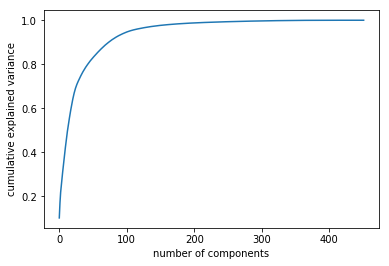

In [352]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(cat_df_ready)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [355]:
pca_0 = PCA(300).fit(X_train)
X_train_pca = pca_0.transform(X_train)
X_test_pca = pca_0.transform(X_test)

model_0 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model_0.fit(X_train_pca, y_train)
y_pred = model_0.predict(X_test_pca)
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.60      0.62      0.61      9535
          1       0.73      0.71      0.72     13640

avg / total       0.67      0.67      0.67     23175

